In [1]:
import os 
import glob 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

c:\Users\kim_h\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path = './data/data_noNull.csv'

In [3]:
data = pd.read_csv(path)

data.head()

,date,sample_time_continuous_caster,steel_type,doc_requirement,"workpiece_weight, tonn",workpiece_slice_geometry_150x150,cast_in_row,alloy_type_open,"alloy_speed, meter/minute","steel_weight_theoretical, tonn",...,"Ca, %","N, %","Pb, %","Mg, %","Zn, %",sleeve,"quantity, tonn",num_crystallizer,num_stream,RUL
0,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,1,18,1,3,164.2,...,0.0007,0.0037,0.0,0.0,0.0,30013346,0.01,2,1,814.0
1,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,1,18,1,3,164.2,...,0.0007,0.0037,0.0,0.0,0.0,30013350,0.01,5,2,0.0
2,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,1,18,1,3,164.2,...,0.0007,0.0037,0.0,0.0,0.0,30012261,0.01,22,4,0.0
3,2020-01-05,2020-01-05 14:59:52,St3sp,Contract,161.7,1,6,1,3,162.1,...,0.0011,0.0056,0.0,0.0,0.0,30013346,0.03,2,1,1148.0
4,2020-01-05,2020-01-05 14:59:52,St3sp,Contract,161.7,1,6,1,3,162.1,...,0.0011,0.0056,0.0,0.0,0.0,30013350,0.03,5,2,341.0


In [11]:
# 스틸 타입별 컬럼 확인
def vis(data, col):
    fig = plt.figure(figsize=(14,14))

    for i,name in enumerate(data['steel_type'].value_counts().index):
        plt.subplot(4,3,1+i)
        result = data[data['steel_type']==name][col].value_counts()
        result.plot(kind='bar')
        plt.xticks(rotation=30)
        plt.title(name)
        plt.tight_layout()
    plt.show()

In [12]:
data.columns

Index(['date', 'sample_time_continuous_caster', 'steel_type',
       'doc_requirement', 'workpiece_weight, tonn',
       'workpiece_slice_geometry_150x150', 'cast_in_row', 'alloy_type_open',
       'alloy_speed, meter/minute', 'steel_weight_theoretical, tonn',
       'steel_weight, tonn', 'grab1_num',
       'steel_temperature_grab1, Celsius deg.', 'metal_residue_grab1, tonn',
       'grab2_num', 'resistance, tonn', 'swing_frequency, amount/minute',
       'crystallizer_movement, mm', 'water_consumption, liter/minute',
       'water_temperature_delta, Celsius deg.',
       'water_consumption_secondary_cooling_zone_num1, liter/minute',
       'water_consumption_secondary_cooling_zone_num2, liter/minute',
       'water_consumption_secondary_cooling_zone_num3, liter/minute', 'Ce, %',
       'C, %', 'Si, %', 'Mn,%', 'S, %', 'P, %', 'Cr, %', 'Ni, %', 'Cu, %',
       'As, %', 'Mo, %', 'Nb, %', 'Ti, %', 'V, %', 'Al, %', 'Ca, %', 'N, %',
       'Pb, %', 'Mg, %', 'Zn, %', 'sleeve', 'quantity, t

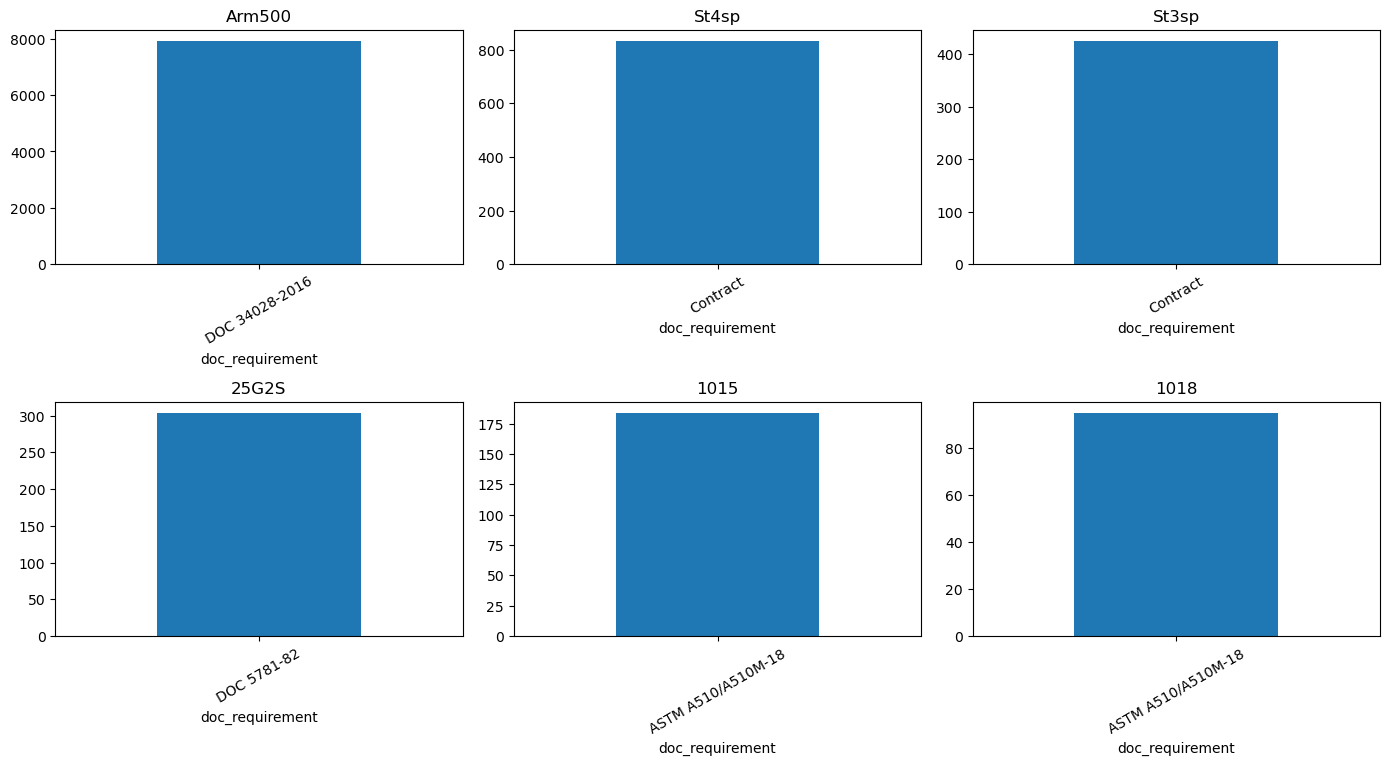

In [13]:
vis(data, 'doc_requirement')

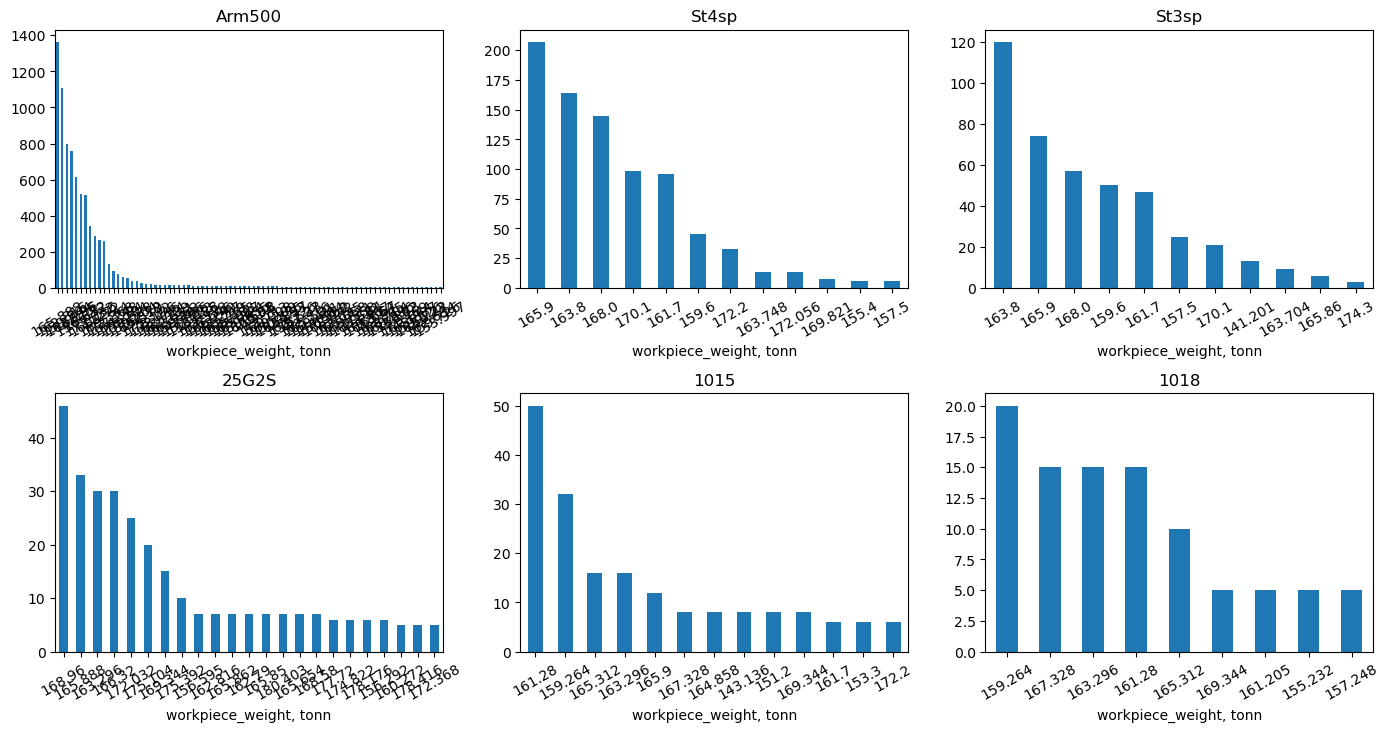

In [14]:
vis(data, 'workpiece_weight, tonn')

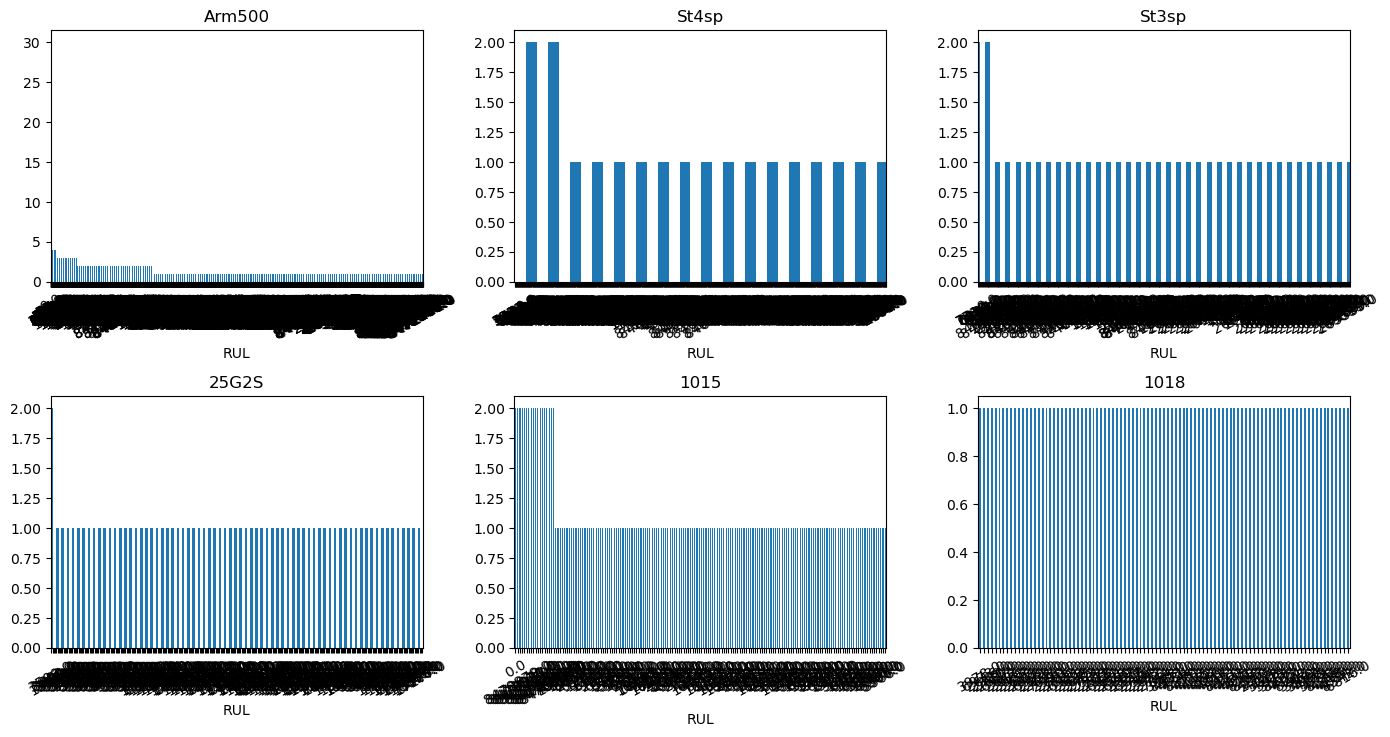

In [15]:
vis(data, 'RUL')

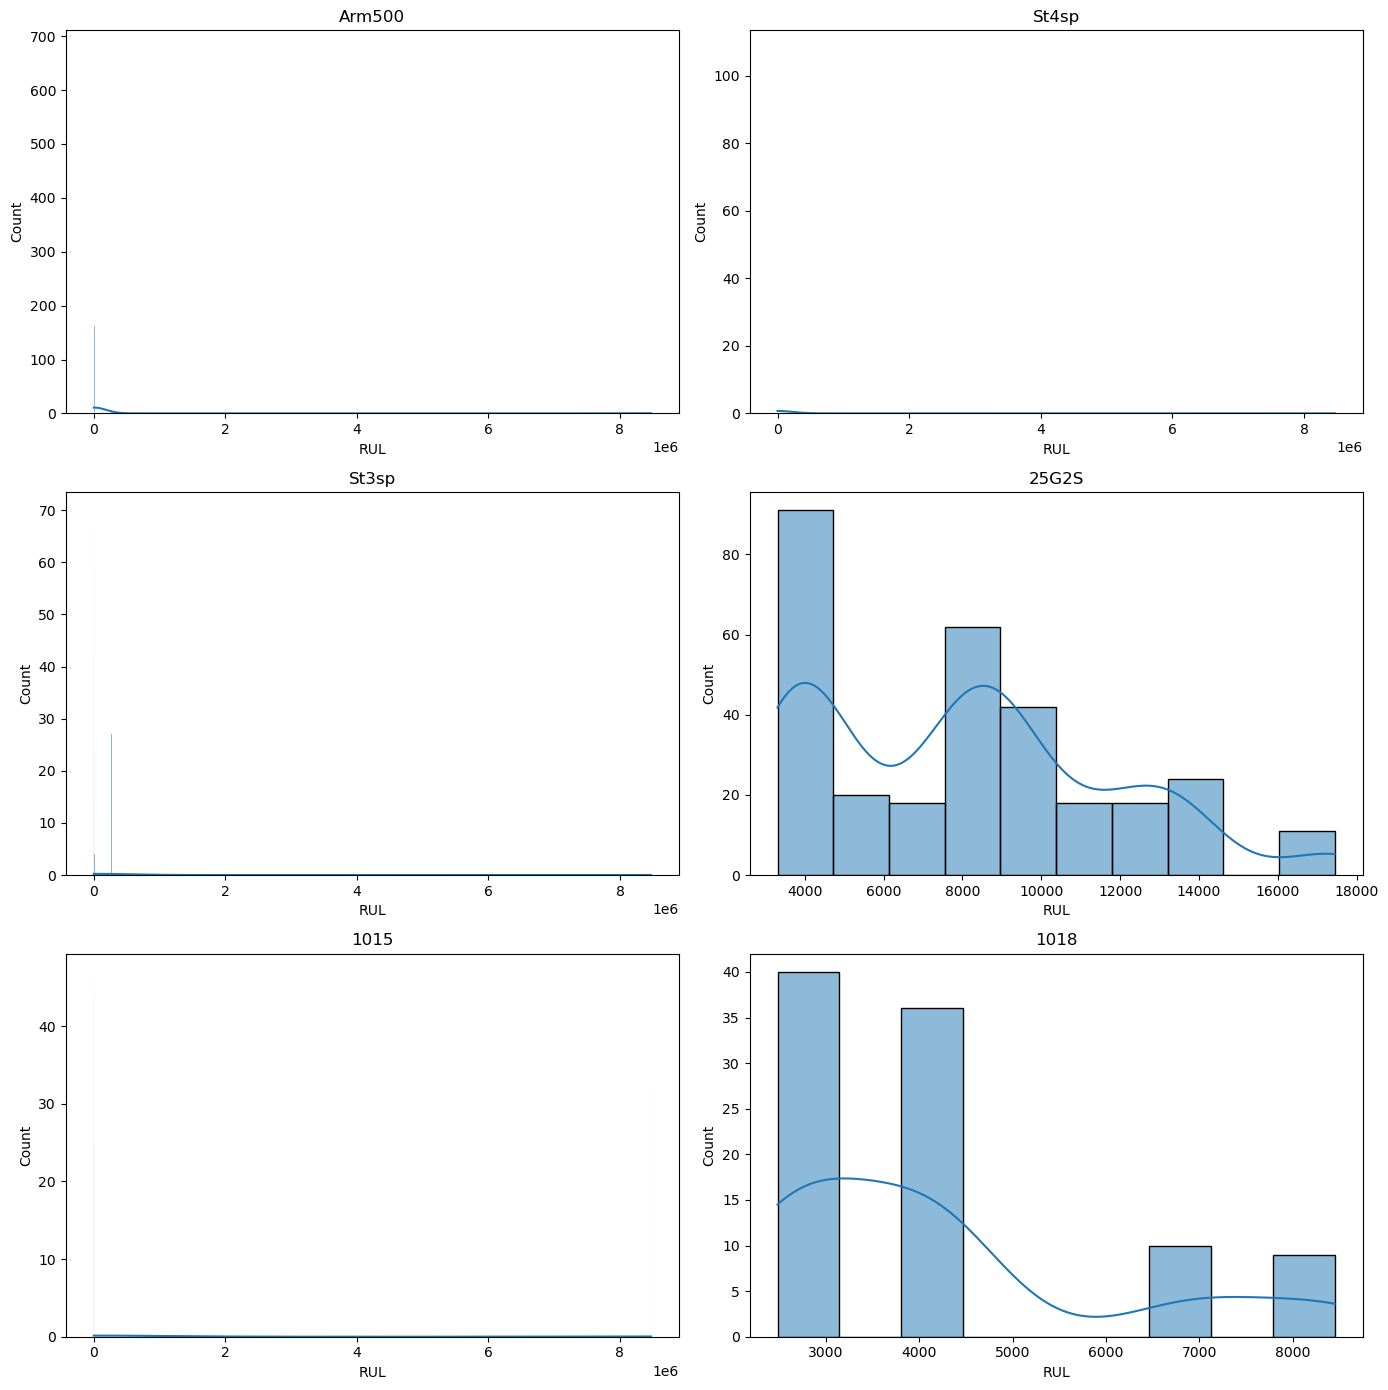

In [10]:
fig = plt.figure(figsize=(14,14))

for i,name in enumerate(data['steel_type'].value_counts().index):
    plt.subplot(3,2,1+i)
    sns.histplot(data[data['steel_type']==name]['RUL'], kde=True)
    plt.title(name)
plt.tight_layout()
plt.show()

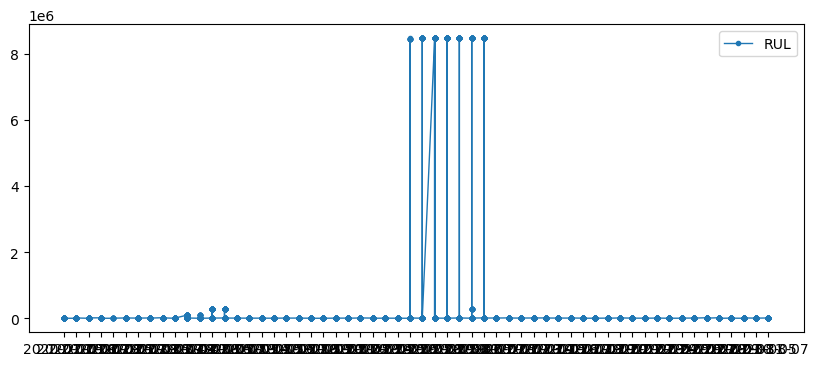

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(data['date'], data['RUL'], 'o-', ms=3, lw=1, label='RUL')
plt.legend()


In [9]:
df_Arm500 = data[data['steel_type']=="Arm500"]
df_St4sp = data[data['steel_type']=="St4sp"]
df_St3sp = data[data['steel_type']=="St3sp"]
df_1015 = data[data['steel_type']=="1015"]
df_25G2S = data[data['steel_type']=="1015"]
df_1018 = data[data['steel_type']=="1018"]
df_1010 = data[data['steel_type']=="1010"]

df_Arm240 = data[data['steel_type']=="Arm240"]
df_YP = data[data['steel_type']=="YP"]
df_1008 = data[data['steel_type']=="1008"]
df_V500V = data[data['steel_type']=="V500V"]
df_20 = data[data['steel_type']=="20"]

### 데이터셋에서 가장 많은 비중을 차지하는 df_Arm500를 먼저 진행한다

In [10]:
df_Arm500.shape

(7916, 48)

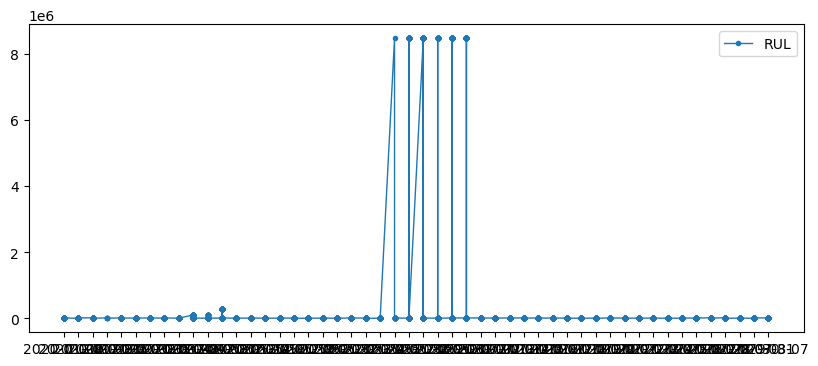

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(df_Arm500['date'], df_Arm500['RUL'], 'o-', ms=3, lw=1, label='RUL')
plt.legend()

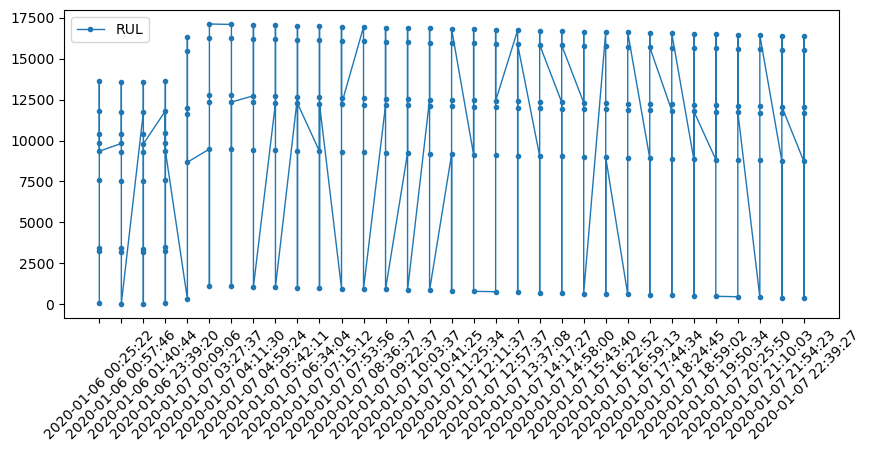

In [12]:
data_df_Arm500 = df_Arm500[df_Arm500['date'].between('2020-01-06', '2020-01-07')]
plt.figure(figsize=(10, 4))
plt.plot(data_df_Arm500['sample_time_continuous_caster'], data_df_Arm500['RUL'], 'o-', ms=3, lw=1, label='RUL')
plt.xticks(rotation=45)
plt.legend()

시계열적 특성이 보인다고 말하기 어려움. 

같은 시간에 여러개의 RUL값이 보이기 때문

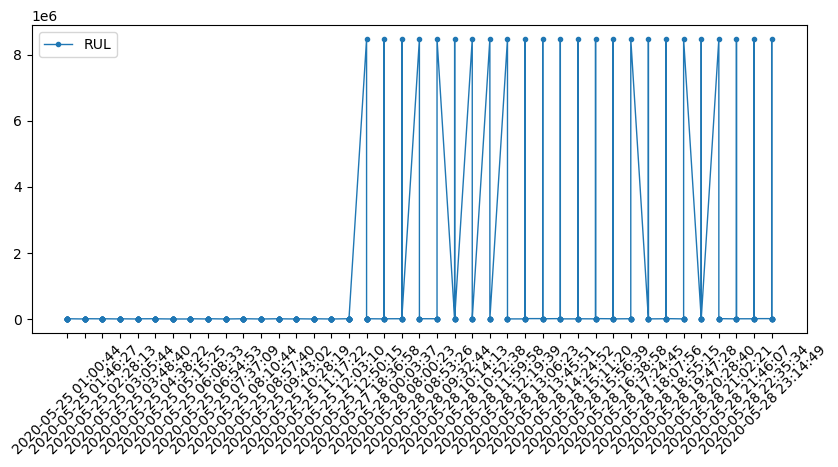

In [13]:
data_df_Arm500 = df_Arm500[df_Arm500['date'].between('2020-05-25', '2020-05-28')]
plt.figure(figsize=(10, 4))
plt.plot(data_df_Arm500['sample_time_continuous_caster'], data_df_Arm500['RUL'], 'o-', ms=3, lw=1, label='RUL')
plt.xticks(rotation=45)
plt.legend()

특정 기간에 변수들이 변경된것으로 보임 

이를 통해 굉장히 높은 RUL을 갖는 제품을 만들었음을 알 수 있음

### 특정 값이상인 구역이 있다. 데이터셋을 나눠준다.

In [14]:
high_RUL = df_Arm500[df_Arm500['RUL']>20000]
nomal_RUL = df_Arm500[df_Arm500['RUL']<20000]

print(len(high_RUL))
print(len(nomal_RUL))

194
7722


In [15]:
print(high_RUL['RUL'].mean())
print(nomal_RUL['RUL'].mean())

5779969.670103093
5681.240740740741


높은 RUL을 갖는 데이터셋과, 보통 RUL을 갖는 데이터셋을 비교해본다.

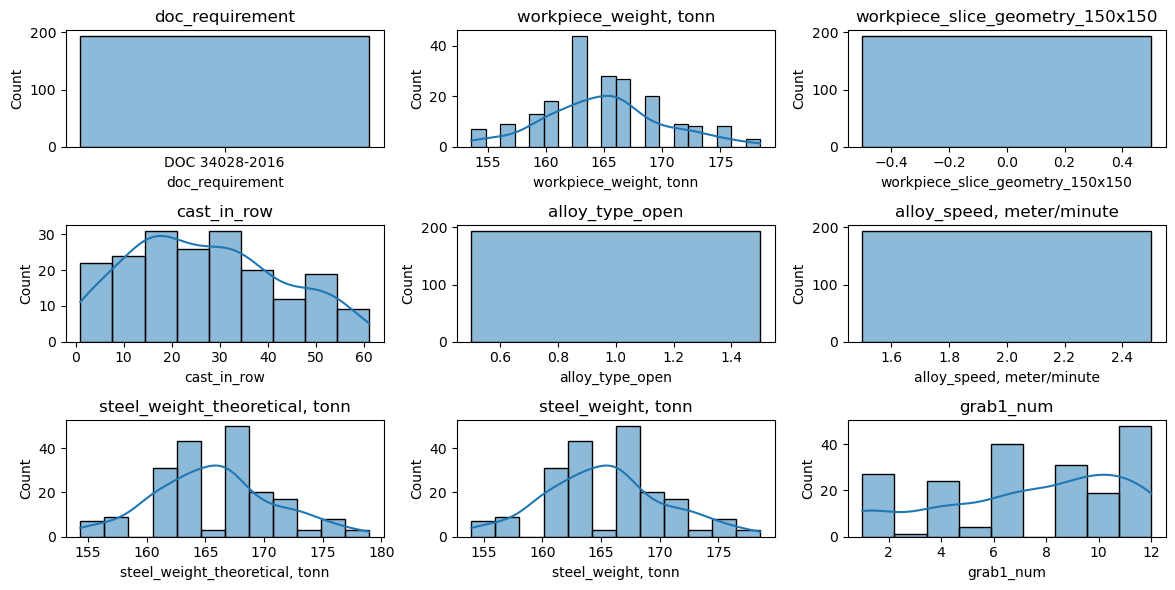

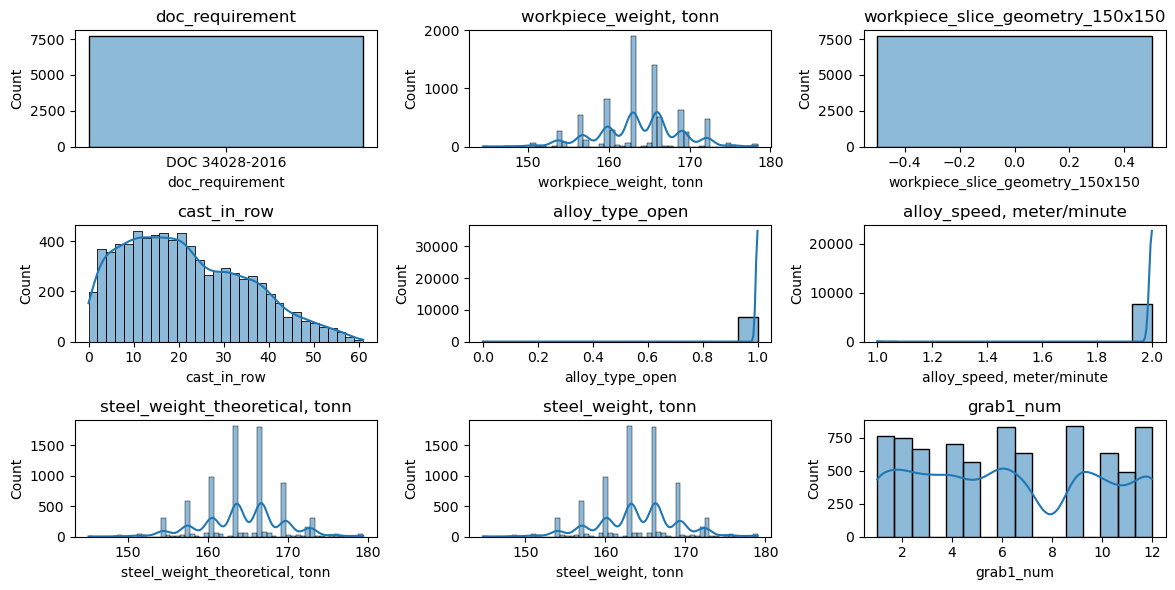

In [16]:
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(high_RUL.columns[3:12]):
    plt.subplot(3,3,1+i)
    sns.histplot(high_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

fig = plt.figure(figsize=(12,6))

for i,col in enumerate(nomal_RUL.columns[3:12]):
    plt.subplot(3,3,1+i)
    sns.histplot(nomal_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

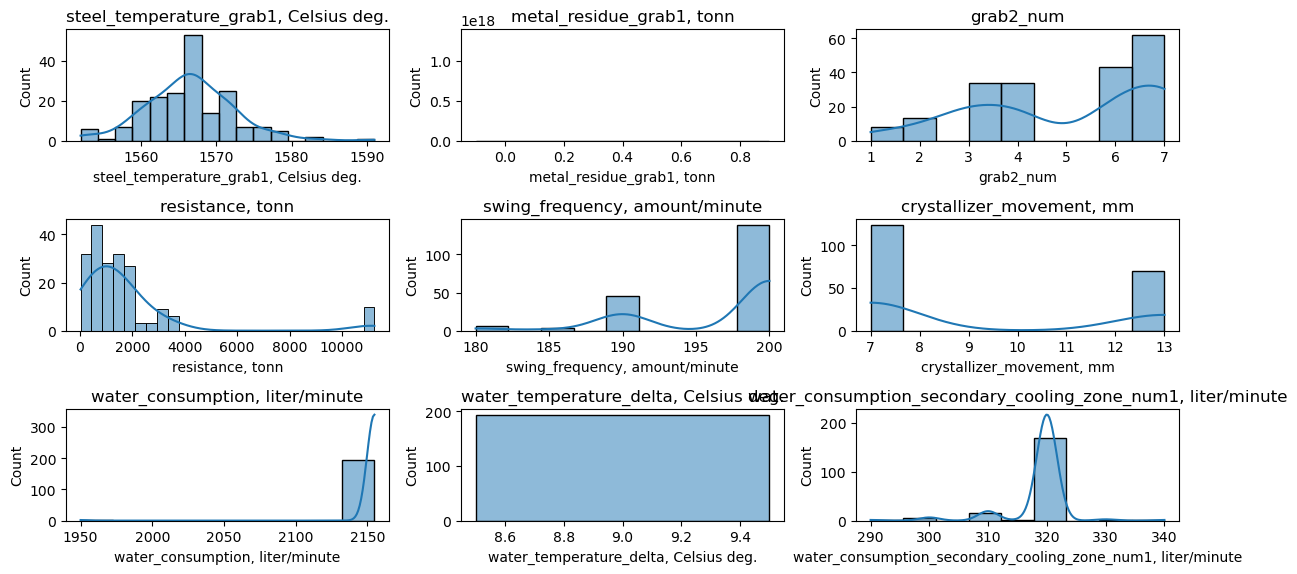

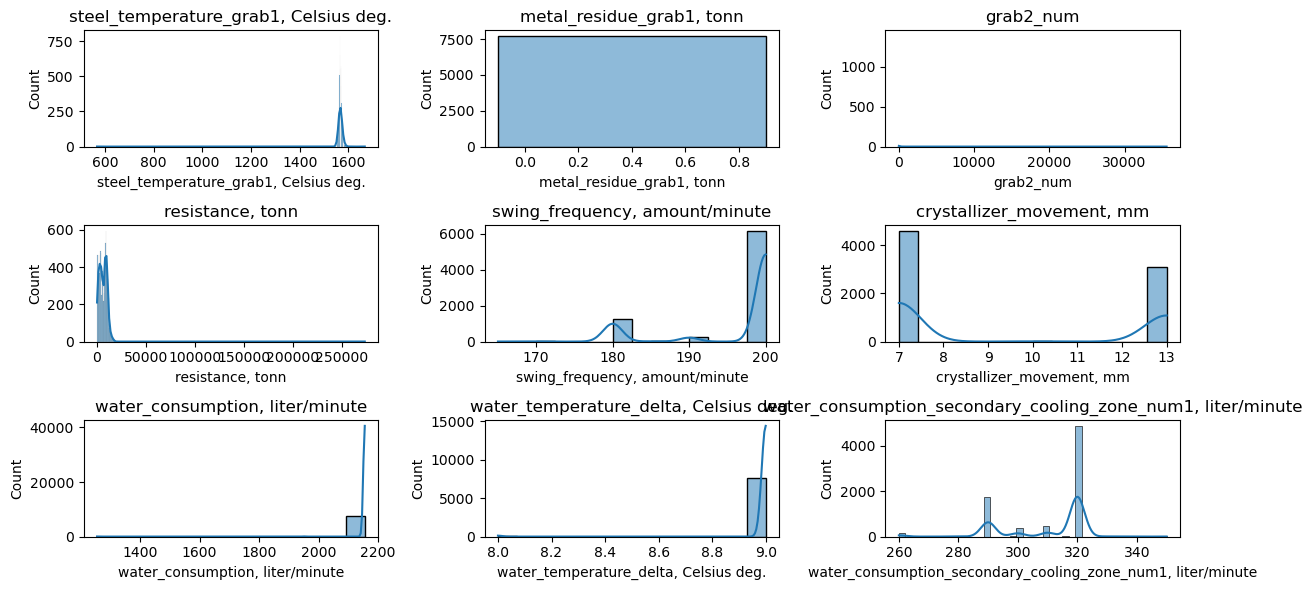

In [17]:
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(high_RUL.columns[12:21]):
    plt.subplot(3,3,1+i)
    sns.histplot(high_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

fig = plt.figure(figsize=(12,6))

for i,col in enumerate(nomal_RUL.columns[12:21]):
    plt.subplot(3,3,1+i)
    sns.histplot(nomal_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

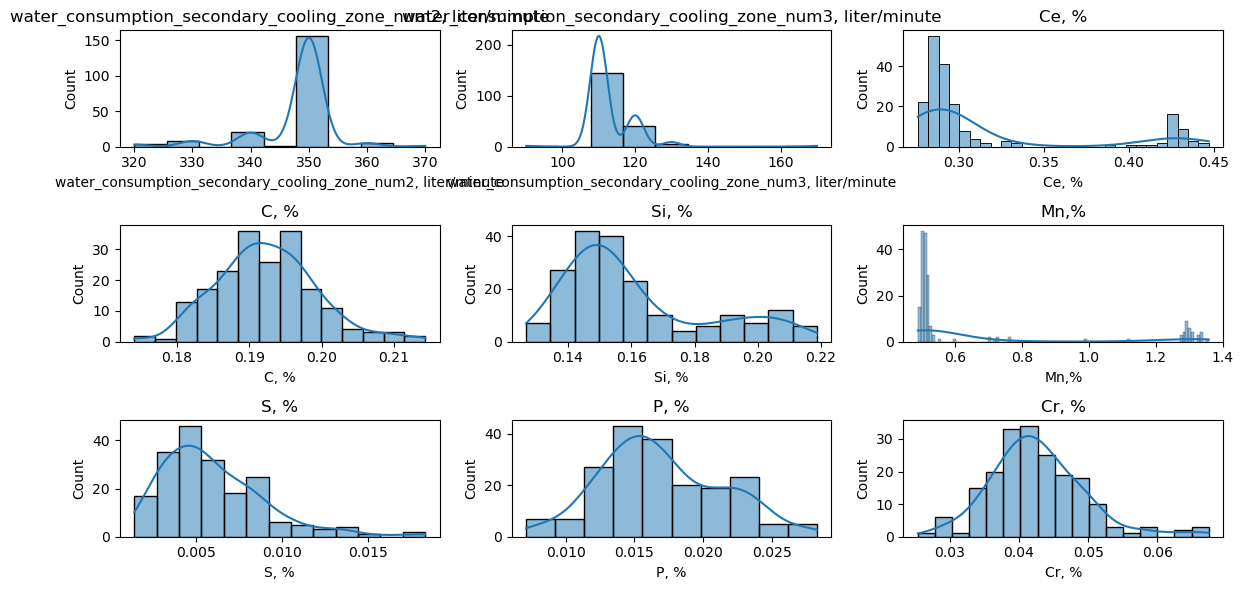

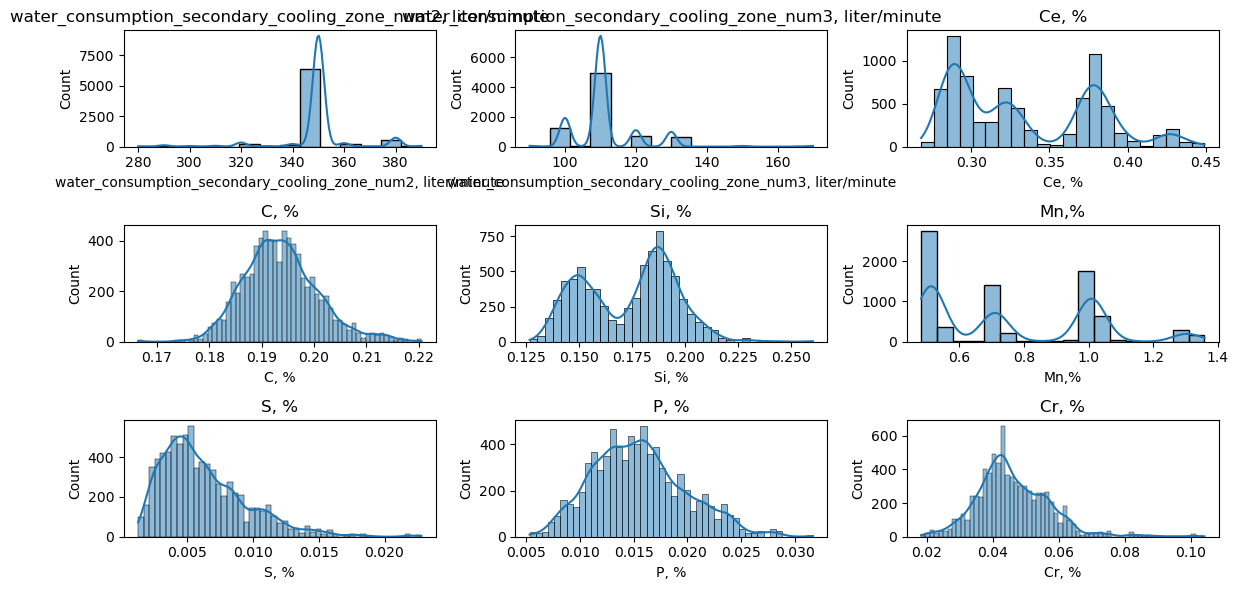

In [18]:
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(high_RUL.columns[21:30]):
    plt.subplot(3,3,1+i)
    sns.histplot(high_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

fig = plt.figure(figsize=(12,6))

for i,col in enumerate(nomal_RUL.columns[21:30]):
    plt.subplot(3,3,1+i)
    sns.histplot(nomal_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

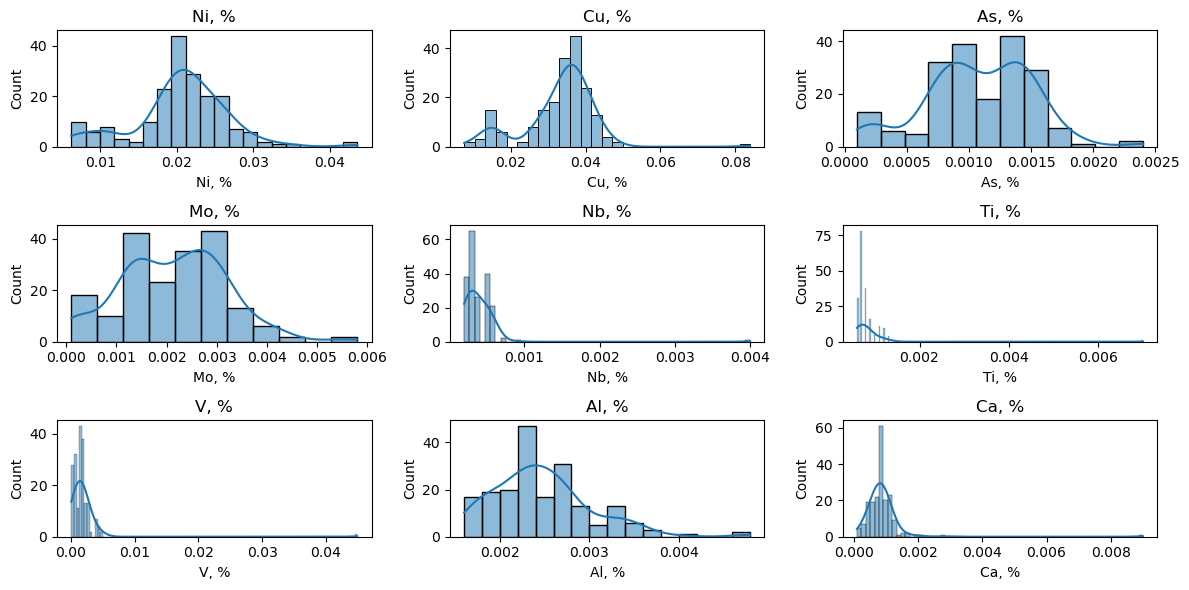

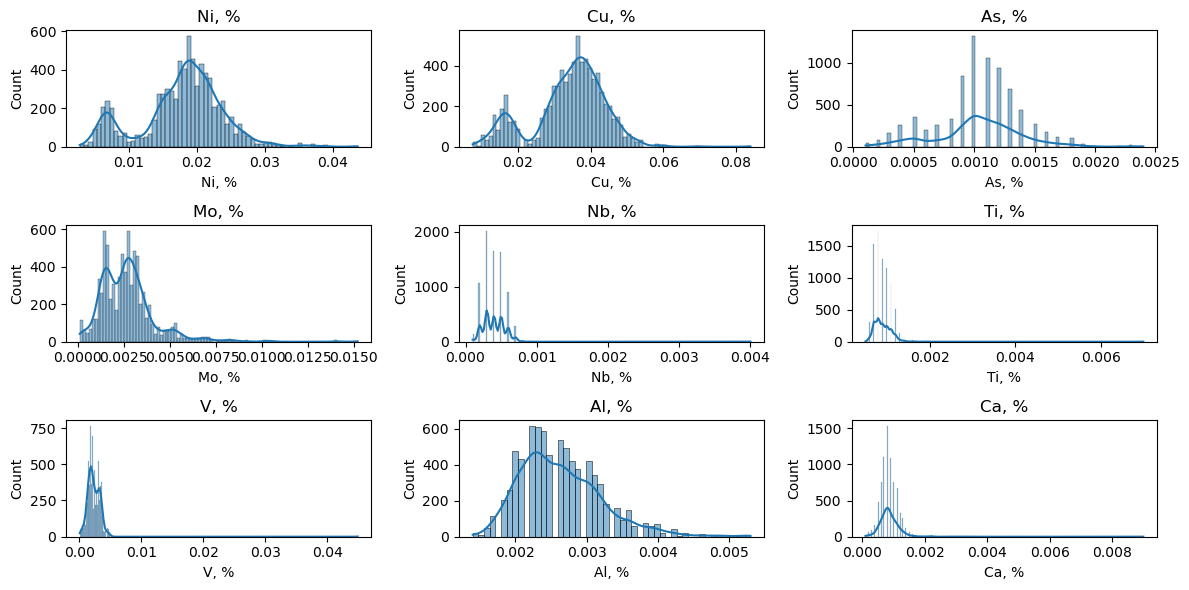

In [19]:
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(high_RUL.columns[30:39]):
    plt.subplot(3,3,1+i)
    sns.histplot(high_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

fig = plt.figure(figsize=(12,6))

for i,col in enumerate(nomal_RUL.columns[30:39]):
    plt.subplot(3,3,1+i)
    sns.histplot(nomal_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

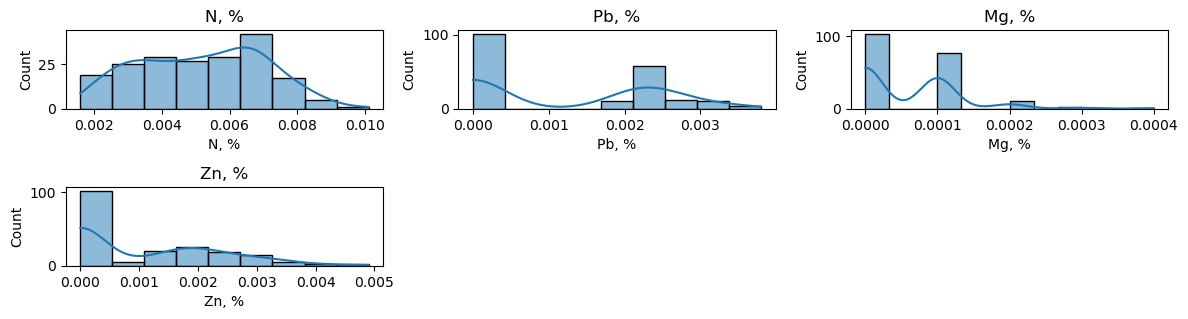

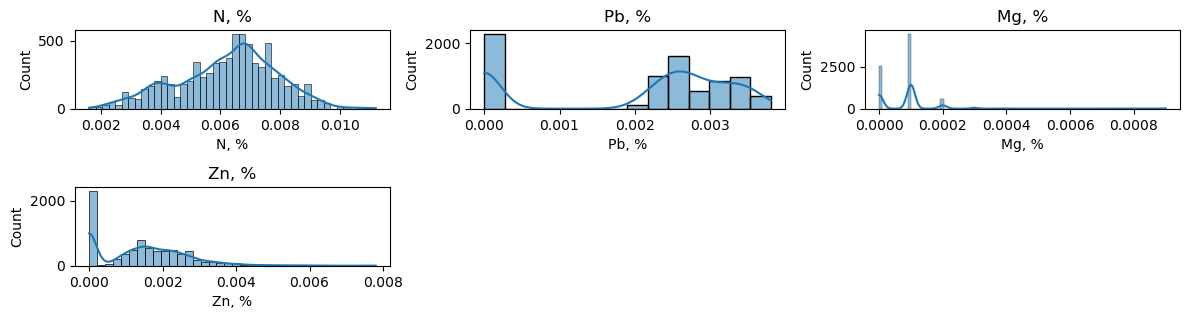

In [20]:
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(high_RUL.columns[39:-5]):
    plt.subplot(4,3,1+i)
    sns.histplot(high_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

fig = plt.figure(figsize=(12,6))

for i,col in enumerate(nomal_RUL.columns[39:-5]):
    plt.subplot(4,3,1+i)
    sns.histplot(nomal_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

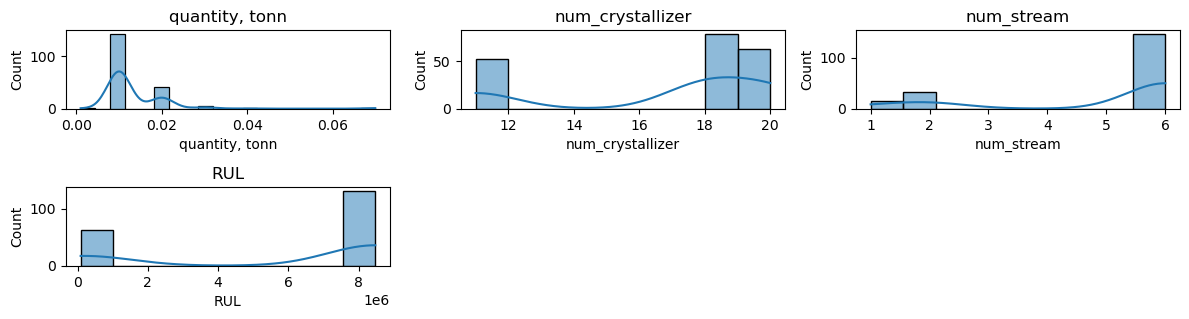

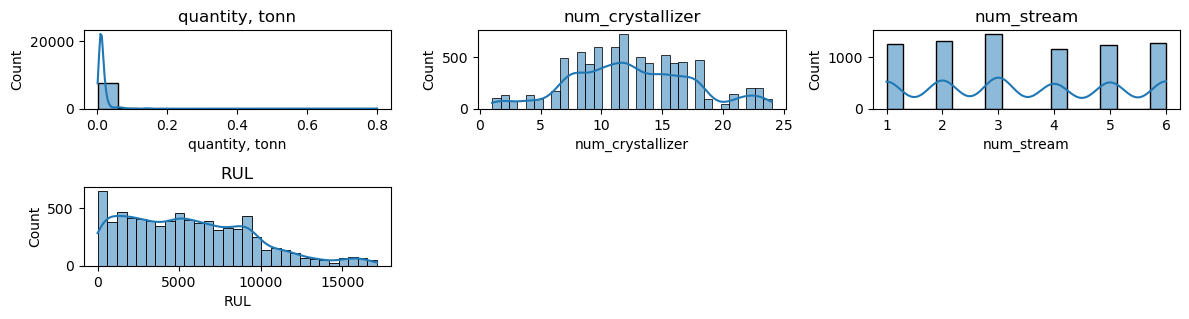

In [21]:
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(high_RUL.columns[-4:]):
    plt.subplot(4,3,1+i)
    sns.histplot(high_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

fig = plt.figure(figsize=(12,6))

for i,col in enumerate(nomal_RUL.columns[-4:]):
    plt.subplot(4,3,1+i)
    sns.histplot(nomal_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

높은 RUL을 갖을때 확실한 features (필수 조건 값)
- alloy_type_open                   -> 1 
- alloy_speed, meter/minute         -> 2
- metal_residue_grab1, tonn         -> 0.4
- water_temperature_delta, Celsius deg. -> 9

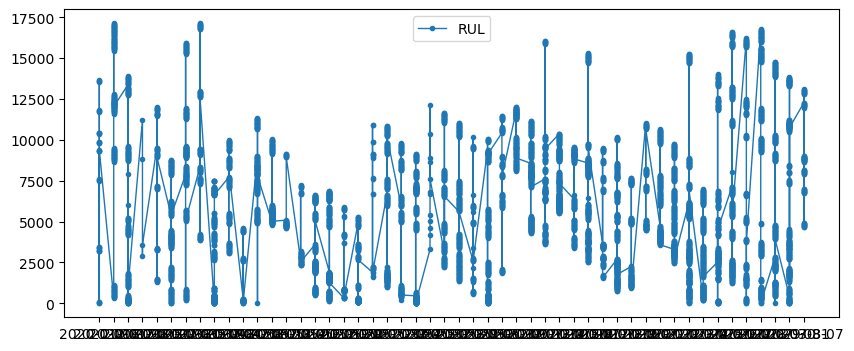

In [22]:
plt.figure(figsize=(10, 4))
plt.plot(nomal_RUL['date'], nomal_RUL['RUL'], 'o-', ms=3, lw=1, label='RUL')
plt.legend()

### 불량품과 양품 분석

In [23]:
df_Arm500['RUL'].min()

0.0

In [33]:
print(len(nomal_RUL[nomal_RUL['RUL']==0]))
print(len(nomal_RUL[nomal_RUL['RUL']!=0]))

30
7692


In [34]:
abnomal_RUL = nomal_RUL[nomal_RUL['RUL']<100]
general_nomal_RUL = nomal_RUL[nomal_RUL['RUL']>100]

print(len(abnomal_RUL))
print(len(general_nomal_RUL))

130
7592


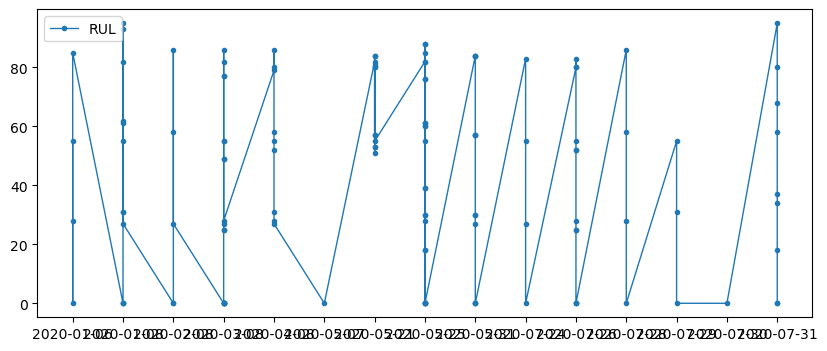

In [35]:
plt.figure(figsize=(10, 4))
plt.plot(abnomal_RUL['date'], abnomal_RUL['RUL'], 'o-', ms=3, lw=1, label='RUL')
plt.legend()

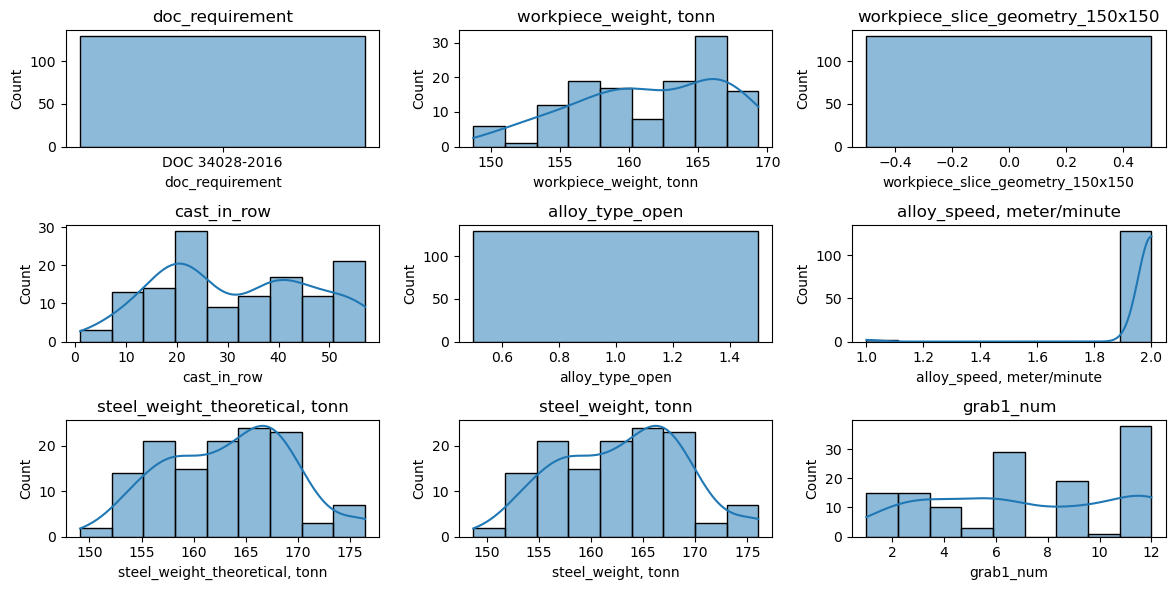

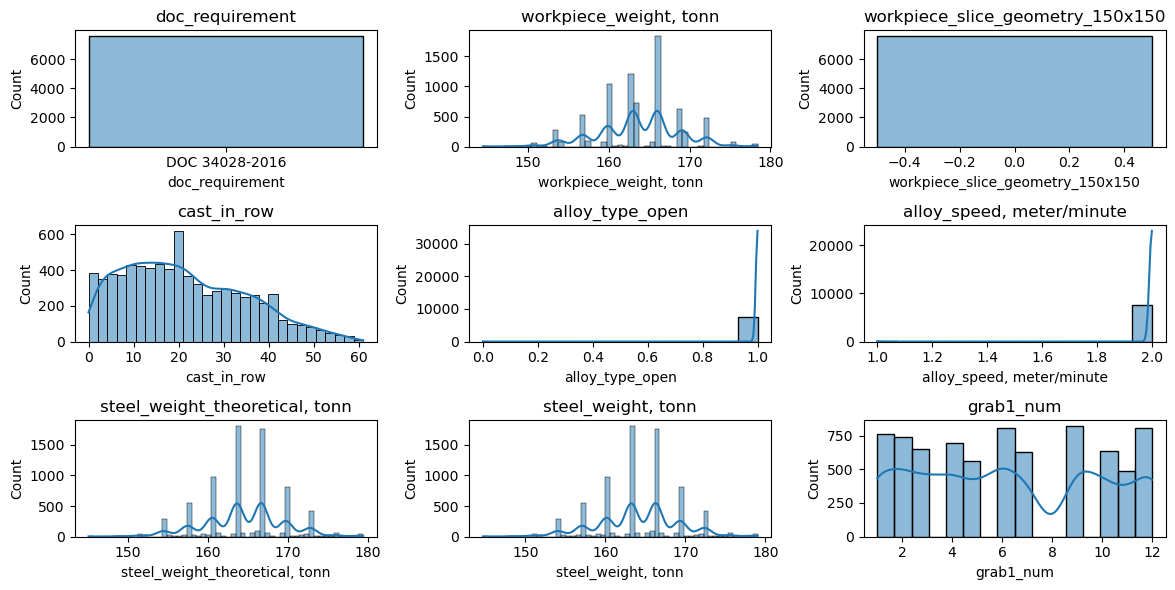

In [36]:
fig = plt.figure(figsize=(12,6))

for i,col in enumerate(abnomal_RUL.columns[3:12]):
    plt.subplot(3,3,1+i)
    sns.histplot(abnomal_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

fig = plt.figure(figsize=(12,6))

for i,col in enumerate(general_nomal_RUL.columns[3:12]):
    plt.subplot(3,3,1+i)
    sns.histplot(general_nomal_RUL[col], kde=True)
    plt.title(col)
    
plt.tight_layout() 
plt.show()

-> 불량 공정 탐지도 가능해보인다.

### 목표 저항(target resistance)을 가진 슬리브와 그렇지 않은 슬리브의 성능을 비교하고 이를 초래한 매개변수 찾기

1. 'resistance, tonn'와 'sleeve'의 관계 알아보기 
2. 'resistance, tonn'와 'RUL'의 관계 알아보기 

In [65]:
high_RUL['resistance, tonn']

1294    1426.0
1301    1454.0
1306    1482.0
1314    1509.0
1318    1534.0
         ...  
5331    2540.0
5337    1543.0
5338    2568.0
5341    2595.0
5343    1577.0
Name: resistance, tonn, Length: 194, dtype: float64

1. 'resistance, tonn'와 'RUL' 관계 찾기

In [66]:
resistance_RUL = df_Arm500.groupby('resistance, tonn',as_index=False)[['RUL']].agg(['min','max','mean'])
resistance_RUL

resistance, tonn      RUL                         
                           min        max          mean
0                25.0  11209.0    16610.0  1.359425e+04
1                27.0   6702.0    10917.0  9.116909e+03
2                28.0   8483.0   273242.0  5.517700e+04
3                51.0   8901.0  8473084.0  4.240992e+06
4                54.0   6675.0    12154.0  9.554111e+03
...               ...      ...        ...           ...
4751          17235.0     31.0       31.0  3.100000e+01
4752          17266.0      0.0        0.0  0.000000e+00
4753          17731.0      0.0        0.0  0.000000e+00
4754          18863.0      0.0        0.0  0.000000e+00
4755         273270.0      0.0        0.0  0.000000e+00

[4756 rows x 4 columns]

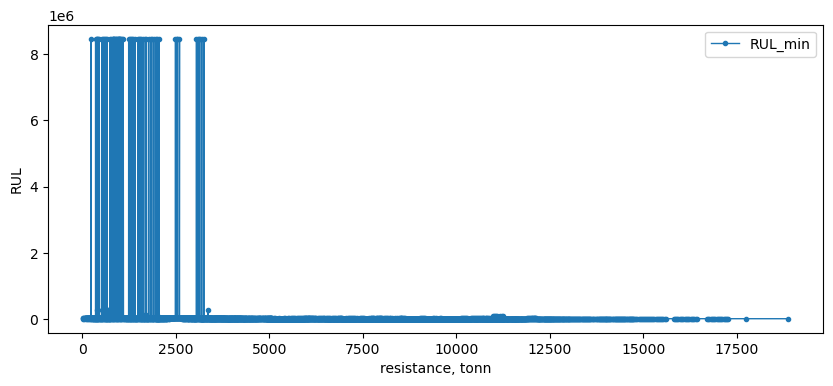

In [78]:
plt.figure(figsize=(10, 4))
plt.plot(resistance_RUL['resistance, tonn'][:-1], resistance_RUL['RUL']['min'][:-1], 'o-', ms=3, lw=1, label='RUL_min')

plt.xlabel('resistance, tonn')
plt.ylabel('RUL_min')
plt.legend()

In [94]:
new_resistance_RUL = df_Arm500[df_Arm500['RUL']<60000].groupby('resistance, tonn',as_index=False)[['RUL']].mean()
new_resistance_RUL.head()

,"resistance, tonn",RUL
0,25.0,13594.250000
1,27.0,9116.909091
2,28.0,11564.000000
3,51.0,8901.000000
4,54.0,9554.111111


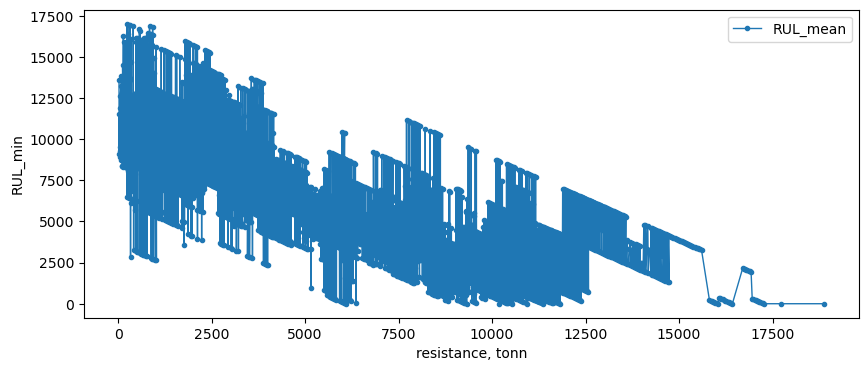

In [95]:
plt.figure(figsize=(10, 4))
plt.plot(new_resistance_RUL['resistance, tonn'][:-1], new_resistance_RUL['RUL'][:-1], 'o-', ms=3, lw=1, label='RUL_mean')
# plt.bar(new_resistance_RUL['resistance, tonn'][:-1], new_resistance_RUL['RUL']['min'][:-1], label='RUL_min')

plt.xlabel('resistance, tonn')
plt.ylabel('RUL_min')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


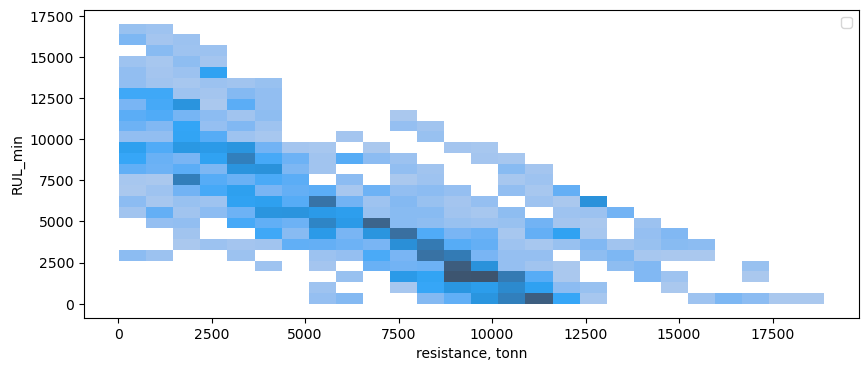

In [101]:
plt.figure(figsize=(10, 4))
sns.histplot(new_resistance_RUL.iloc[:-1], x='resistance, tonn', y='RUL', kde=True)
plt.xlabel('resistance, tonn')
plt.ylabel('RUL_min')
plt.legend()

-> **'resistance, tonn'가 낮을 수록 RUL이 비교적 높다**

낮은 'resistance, tonn'일때 RUL은 비교적 높은 값을 갖는다

이유:

$RUL = R_{max} - R_{current}$

$R_{max}$ :  'sleeve', 'num_crystallizer', 'num_stream' 조합에서의 최고 저항값

$R_{current}$ : 각 조합에서의 현재 저항값

$R_{current}$ 즉 현재 resistance 값이 낮아야 RUL이 높음 

2. 'resistance, tonn'와 'sleeve' 관계 찾기

In [45]:
resistance_sleeve = df_Arm500.groupby('resistance, tonn',as_index=False)[['sleeve']].agg(['min','max','mean'])

resistance_sleeve

resistance, tonn    sleeve                        
                            min       max          mean
0                25.0  30014804  30014825  3.001482e+07
1                27.0  30013359  30014193  3.001398e+07
2                28.0     83898  30014817  2.502601e+07
3                51.0  30013876  30014193  3.001403e+07
4                54.0  30013359  30014193  3.001397e+07
...               ...       ...       ...           ...
4751          17235.0  30013866  30013866  3.001387e+07
4752          17266.0  30013866  30013866  3.001387e+07
4753          17731.0  30012912  30014080  3.001350e+07
4754          18863.0  30014810  30014810  3.001481e+07
4755         273270.0  30014189  30014189  3.001419e+07

[4756 rows x 4 columns]

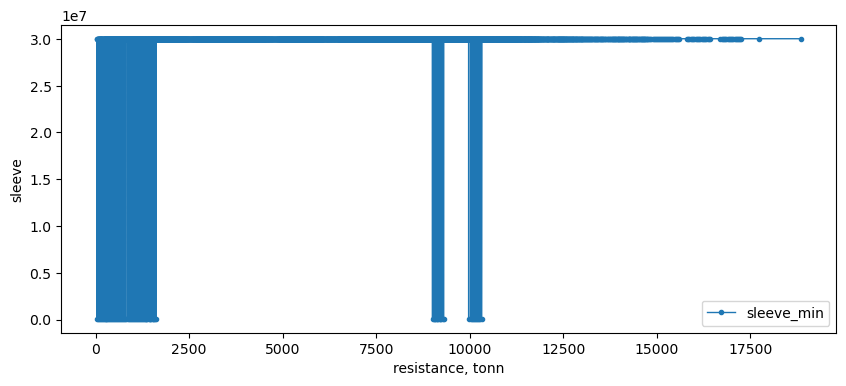

In [85]:
plt.figure(figsize=(10, 4))
plt.plot(resistance_sleeve['resistance, tonn'][:-1], resistance_sleeve['sleeve']['min'][:-1], 'o-', ms=3, lw=1, label='sleeve_min')

plt.xlabel('resistance, tonn')
plt.ylabel('sleeve')
plt.legend()

In [108]:
new_resistance_sleeve = df_Arm500[df_Arm500['resistance, tonn']<2500].groupby('resistance, tonn',as_index=False)[['sleeve']].mean()
new_resistance_sleeve.head()

,"resistance, tonn",sleeve
0,25.0,3.001482e+07
1,27.0,3.001398e+07
2,28.0,2.502601e+07
3,51.0,3.001403e+07
4,54.0,3.001397e+07


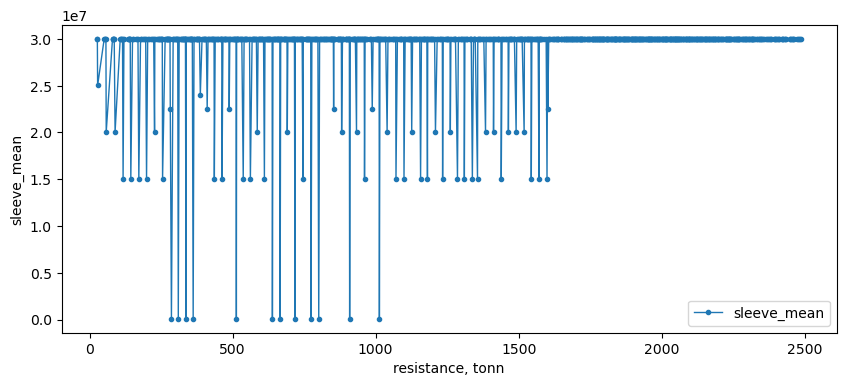

In [109]:
plt.figure(figsize=(10, 4))
plt.plot(new_resistance_sleeve['resistance, tonn'][:-1], new_resistance_sleeve['sleeve'][:-1], 'o-', ms=3, lw=1, label='sleeve_mean')
# plt.bar(new_resistance_RUL['resistance, tonn'][:-1], new_resistance_RUL['RUL']['min'][:-1], label='RUL_min')

plt.xlabel('resistance, tonn')
plt.ylabel('sleeve_mean')
plt.legend()

In [121]:
new_resistance_sleeve = df_Arm500[(df_Arm500['sleeve']>100000)].groupby('resistance, tonn',as_index=False)[['sleeve']].mean()
new_resistance_sleeve.head()

,"resistance, tonn",sleeve
0,25.0,3.001482e+07
1,27.0,3.001398e+07
2,28.0,3.001444e+07
3,51.0,3.001403e+07
4,54.0,3.001397e+07


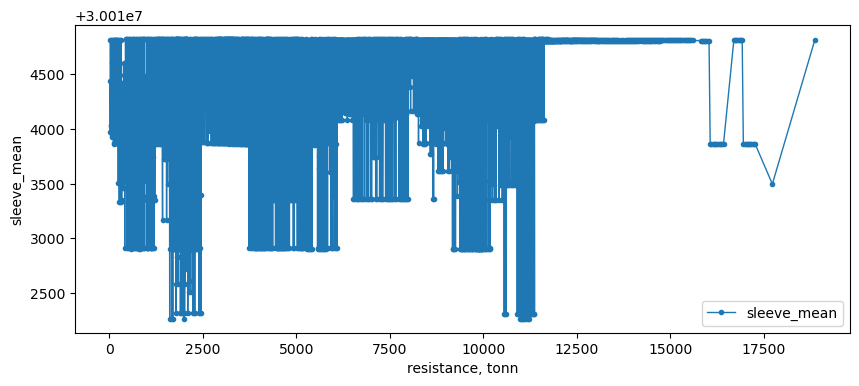

In [122]:
plt.figure(figsize=(10, 4))
plt.plot(new_resistance_sleeve['resistance, tonn'][:-1], new_resistance_sleeve['sleeve'][:-1], 'o-', ms=3, lw=1, label='sleeve_mean')
# plt.bar(new_resistance_RUL['resistance, tonn'][:-1], new_resistance_RUL['RUL']['min'][:-1], label='RUL_min')

plt.xlabel('resistance, tonn')
plt.ylabel('sleeve_mean')
plt.legend()

-> **위 시각자료만으로는 sleeve와 resistance 간의 관계를 찾기 어렵다**


3. 'sleeve'와 'RUL' 관계 찾기

In [123]:
sleeve_RUL = df_Arm500.groupby('sleeve',as_index=False)[['RUL']].agg(['min','max','mean'])

sleeve_RUL

sleeve      RUL                       
                  min      max          mean
0      83898      0.0  10288.0   7000.376471
1   30011717      0.0   9582.0   4869.468085
2   30012261   3382.0   3458.0   3419.500000
3   30012264  88862.0  98671.0  95434.218750
4   30012903   2629.0  12990.0   7336.752475
..       ...      ...      ...           ...
71  30014817      0.0  11706.0   2915.458974
72  30014820    508.0  11960.0   6842.653846
73  30014821      0.0  10164.0   4797.450363
74  30014824   6642.0  16610.0  13698.919255
75  30014825      0.0  14007.0  11426.058824

[76 rows x 4 columns]

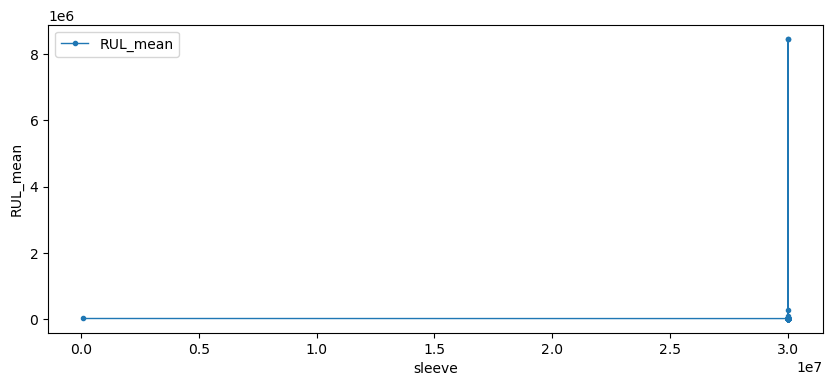

In [126]:
plt.figure(figsize=(10, 4))
plt.plot(sleeve_RUL['sleeve'][:-1], sleeve_RUL['RUL']['mean'][:-1], 'o-', ms=3, lw=1, label='RUL_mean')

plt.xlabel('sleeve')
plt.ylabel('RUL_mean')
plt.legend()

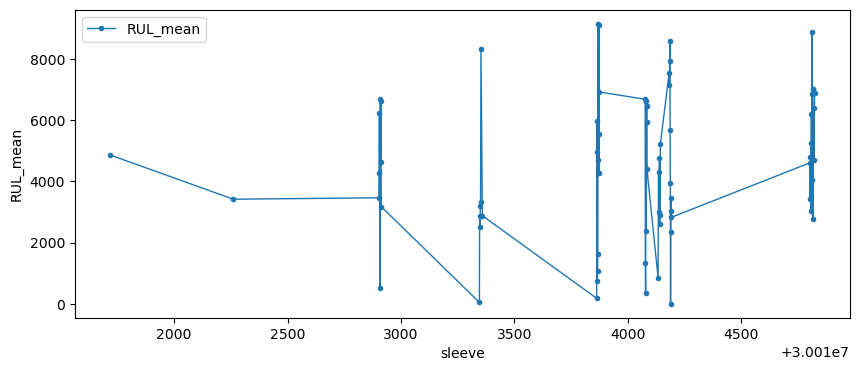

In [131]:
new_sleeve_RUL = df_Arm500[(df_Arm500['sleeve']>100000)&(df_Arm500['RUL']<10000)].groupby('sleeve',as_index=False)[['RUL']].mean()

plt.figure(figsize=(10, 4))
plt.plot(new_sleeve_RUL['sleeve'][:-1], new_sleeve_RUL['RUL'][:-1], 'o-', ms=3, lw=1, label='RUL_mean')

plt.xlabel('sleeve')
plt.ylabel('RUL_mean')
plt.legend()



-> **위 시각자료만으로는 sleeve와 RUL간의 관계가 보이지 않는다** 

In [ ]:
df_Arm500
print(len(high_RUL))
print(len(nomal_RUL))